In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
#import os
#os.chdir('/Users/smarcos/Downloads/')


In [3]:
df = pd.read_csv('ad_data.csv')

In [4]:
df.head()

,click_status,AMP_timestamp,Query Term,IP Address,User Agent,Cost Per Click,Conversions
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10103 entries, 0 to 10102
Data columns (total 7 columns):
click_status       10103 non-null int64
AMP_timestamp      10103 non-null object
Query Term         10103 non-null object
IP Address         10103 non-null object
User Agent         10103 non-null object
Cost Per Click     10103 non-null object
Conversions        10103 non-null int64
dtypes: int64(2), object(5)
memory usage: 552.6+ KB


2. Clean data
Noticed the dataset has 7 columns without missing values. In this section, I am going to clean all columns and create new features for further analysis.

Steps:

Check NaN values and column names
Clean click_status
Clean AMP_timestamp
Clean query_terms
Clean cost_per_click

In [6]:
# 1. Double check NaN values and rename column names
# Check missing values - no NaN values
df[df.isnull().any(axis=1)]

,click_status,AMP_timestamp,Query Term,IP Address,User Agent,Cost Per Click,Conversions


In [7]:
df.columns

Index(['click_status', 'AMP_timestamp', 'Query Term ', 'IP Address',
       'User Agent', 'Cost Per Click ', 'Conversions'],
      dtype='object')

In [8]:
#Index([u'click_status', u'AMP_timestamp', u'Query Term ', u'IP Address',
#       u'Cost Per Click ', u'Conversions', u'User', u'Device'],
#      dtype='object')

In [9]:
# rename columns with extra space
df.columns = ['click_status','AMP_timestamp','query_term','IP_address','user','cost_per_click','conversions']


In [10]:
df.head()

,click_status,AMP_timestamp,query_term,IP_address,user,cost_per_click,conversions
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0


In [11]:
import re
user_data =df['user'].tolist()

devices = []
for i in user_data:
    devices.append(re.sub(r'[^ a-zA-Z]',"",i).split()[1])
df['devices'] = devices    

In [12]:
len(devices)

10103

In [13]:
#2. Clean click_status : click_status 1 = valid click, 0 = invalidated click
df.click_status = df.click_status.map(lambda x: 1 if x == 1 else 0)

3. Clean AMP_timestamp
Extract date and hour
Timestamp ranges from 1/29/15 11:00 - 1/29/15 15:59

In [14]:
df['date'] = df.AMP_timestamp.map(lambda x: x[:7])
df['hour'] = df.AMP_timestamp.map(lambda x: int(x[8:11]))

In [15]:
print ('max hour: ', df['hour'].max())
print ('min hour: ', df['hour'].min())

max hour:  15
min hour:  11


In [16]:
df.head()

,click_status,AMP_timestamp,query_term,IP_address,user,cost_per_click,conversions,devices,date,hour
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0,iPad,29/01/1,11
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0,Windows,29/01/1,11
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0,Windows,29/01/1,11
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0,Windows,29/01/1,11
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0,compatible,29/01/1,11


In [17]:
#max hour:  15
#min hour:  11

4. Clean Query Term
3 query terms related to car loans appeared on the top
The # of query terms ranges from 1 to 7

In [18]:
df.query_term.value_counts().head(10)

["car title loans","loan quotes","car financing"]                                  317
["car title loans","loan quotes","car finance calculator"]                         313
["car title loans","loan quotes","new car payment"]                                290
["Byethost"]                                                                       268
["edu online info","degree programs","online degree program"]                      176
["Naver.com"]                                                                      111
["ron"]                                                                            106
["apartments for rent vancouver craigslist","craigslist used cars","personals"]     88
["force download","youtuby","youtube org"]                                          87
["apricot complex"]                                                                 85
Name: query_term, dtype: int64

In [19]:
'''
["car title loans","loan quotes","car financing"]                                  317
["car title loans","loan quotes","car finance calculator"]                         313
["car title loans","loan quotes","new car payment"]                                290
["Byethost"]                                                                       268
["edu online info","degree programs","online degree program"]                      176
["Naver.com"]                                                                      111
["ron"]                                                                            106
["apartments for rent vancouver craigslist","craigslist used cars","personals"]     88
["force download","youtuby","youtube org"]                                          87
["apricot complex"]                                                                 85
Name: query_term, dtype: int64
'''

'\n["car title loans","loan quotes","car financing"]                                  317\n["car title loans","loan quotes","car finance calculator"]                         313\n["car title loans","loan quotes","new car payment"]                                290\n["Byethost"]                                                                       268\n["edu online info","degree programs","online degree program"]                      176\n["Naver.com"]                                                                      111\n["ron"]                                                                            106\n["apartments for rent vancouver craigslist","craigslist used cars","personals"]     88\n["force download","youtuby","youtube org"]                                          87\n["apricot complex"]                                                                 85\nName: query_term, dtype: int64\n'

In [20]:
# Create a new column that stores query terms as a list
df['query_term_list'] = df.query_term.map(lambda x: x.strip('[').strip(']').replace('"','').split(','))

In [21]:
# Create a new column that indicates the length of the query terms list
df['len_query_term_list'] = df['query_term_list'].map(lambda x: len(x))


In [22]:
df['len_query_term_list'].value_counts()

3    4908
1    4016
2     826
4     139
5     122
6      91
7       1
Name: len_query_term_list, dtype: int64

5. Clean cost_per_click and converstions

In [23]:
df.cost_per_click = df.cost_per_click.map(lambda x: float(x.strip('$ ')))

In [24]:
df.conversions.value_counts()

0     8719
2      814
1      431
3       68
4       56
6        6
5        6
9        2
13       1
Name: conversions, dtype: int64

3. Analysis

* High level trends
* Valid click rate at 86%
* Avg. CPC for valid clicks at 37%
* Total spending for valid clicks 3,287
* Conversion rate 15.8%

In [25]:
df_1 = df[df.click_status == 1]
df_0 = df[df.click_status == 0]

In [26]:
# Valid click rate
len(df_1) / float(len(df))


# results --- 0.8624171038305454


0.8624171038305454

In [27]:
# Avg CPC for valid clicks
df_1.cost_per_click.mean()

# results --- 0.3773258349592622

0.3773258349592622

In [28]:
# Total spending for valid clicks
df_1.cost_per_click.sum()

# results --- 3287.6400000000517

3287.64

In [29]:
# Conversion rate for valid clicks
len(df[df.conversions!=0])/float(len(df_1))

# results --- 0.1588431079995409

0.1588431079995409

2. For clicks with status = 1:
Identify the top spending query term and the average cost per click
Identify the top converting IP addresses

In [30]:
# Identify the top spending query term and the average cost per click
qt_table = pd.pivot_table(df_1,index='query_term',values=['click_status','cost_per_click'],aggfunc=[np.sum]).sort_values(by=('sum','cost_per_click'),ascending=False)
qt_table[('avg','cost_per_click')] = qt_table[('sum','cost_per_click')] / qt_table[('sum','click_status')]
qt_table.head(10)

sum  \
                                                   click_status   
query_term                                                        
["car title loans","loan quotes","car financing"]           295   
["car title loans","loan quotes","car finance c...          296   
["car title loans","loan quotes","new car payme...          270   
["apartments for rent vancouver craigslist","cr...           81   
["turbo tax"]                                                38   
["sprint wireless","sprint mobile","sprint","sp...           27   
["edu online info","degree programs","online de...          174   
["autotrader","autotrade","car website"]                     33   
["turbo tax","turbotax","intuit turbotax"]                    4   
["Byethost"]                                                191   

                                                                   \
                                                   cost_per_click   
query_term                                                          
["car title loans","loan quotes","car financing"]          356.30   
["car title loans","loan quotes","car finance c...         354.83   
["car title loans","loan quotes","new car payme...         337.67   
["apartments for rent vancouver craigslist","cr...          97.11   
["turbo tax"]                                               90.42   
["sprint wireless","sprint mobile","sprint","sp...          61.54   
["edu online info","degree programs","online de...          38.19   
["autotrader","autotrade","car website"]                    36.04   
["turbo tax","turbotax","intuit turbotax"]                  35.51   
["Byethost"]                                                32.47   

                                                              avg  
                                                   cost_per_click  
query_term                                                         
["car title loans","loan quotes","car financing"]        1.207797  
["car title loans","loan quotes","car finance c...       1.198750  
["car title loans","loan quotes","new car payme...       1.250630  
["apartments for rent vancouver craigslist","cr...       1.198889  
["turbo tax"]                                            2.379474  
["sprint wireless","sprint mobile","sprint","sp...       2.279259  
["edu online info","degree programs","online de...       0.219483  
["autotrader","autotrade","car website"]                 1.092121  
["turbo tax","turbotax","intuit turbotax"]               8.877500  
["Byethost"]                                             0.170000

results --

sum	avg
click_status	cost_per_click	cost_per_click
query_term			
["car title loans","loan quotes","car financing"]	295	356.30	1.207797
["car title loans","loan quotes","car finance calculator"]	296	354.83	1.198750
["car title loans","loan quotes","new car payment"]	270	337.67	1.250630
["apartments for rent vancouver craigslist","craigslist used cars","personals"]	81	97.11	1.198889
["turbo tax"]	38	90.42	2.379474
["sprint wireless","sprint mobile","sprint","sprint wireless phones","cell phone","smartphone"]	27	61.54	2.279259
["edu online info","degree programs","online degree program"]	174	38.19	0.219483
["autotrader","autotrade","car website"]	33	36.04	1.092121
["turbo tax","turbotax","intuit turbotax"]	4	35.51	8.877500
["Byethost"]	191	32.47	0.170000

In [31]:
qt_table.columns = ['valid_clicks','total_spending','avg_cpc']

In [32]:
bins = [0, 50, 100, 150, 200,250,300]
group_names = ['<50 Clicks', '50-99 Clicks', '100-149 Clicks', '150-199 Clicks','200-249 Clicks','250+ Clicks']
qt_table['click_bucket'] = pd.cut(qt_table['valid_clicks'], bins, labels=group_names)

In [33]:
qt_table.valid_clicks.mean()

#results -- 3.6857021996615904

3.6857021996615904

In [34]:
qt_table.head()

,valid_clicks,total_spending,avg_cpc,click_bucket
query_term,,,,
"[""car title loans"",""loan quotes"",""car financing""]",295,356.30,1.207797,250+ Clicks
"[""car title loans"",""loan quotes"",""car finance calculator""]",296,354.83,1.198750,250+ Clicks
"[""car title loans"",""loan quotes"",""new car payment""]",270,337.67,1.250630,250+ Clicks
"[""apartments for rent vancouver craigslist"",""craigslist used cars"",""personals""]",81,97.11,1.198889,50-99 Clicks
"[""turbo tax""]",38,90.42,2.379474,<50 Clicks


In [35]:
qt_table.head(20)['valid_clicks']

query_term
["car title loans","loan quotes","car financing"]                                                  295
["car title loans","loan quotes","car finance calculator"]                                         296
["car title loans","loan quotes","new car payment"]                                                270
["apartments for rent vancouver craigslist","craigslist used cars","personals"]                     81
["turbo tax"]                                                                                       38
["sprint wireless","sprint mobile","sprint","sprint wireless phones","cell phone","smartphone"]     27
["edu online info","degree programs","online degree program"]                                      174
["autotrader","autotrade","car website"]                                                            33
["turbo tax","turbotax","intuit turbotax"]                                                           4
["Byethost"]                                                  

-- 100.00% of query terms had 1 or more valid clicks
-- 12.52% of query terms had 5 or more valid clicks
-- 5.88% of query terms had 10 or more valid clicks
-- 1.27% of query terms had 50 or more valid clicks
-- 0.21% of query terms had 100 or more valid clicks
-- 0.13% of query terms had 200 or more valid clicks


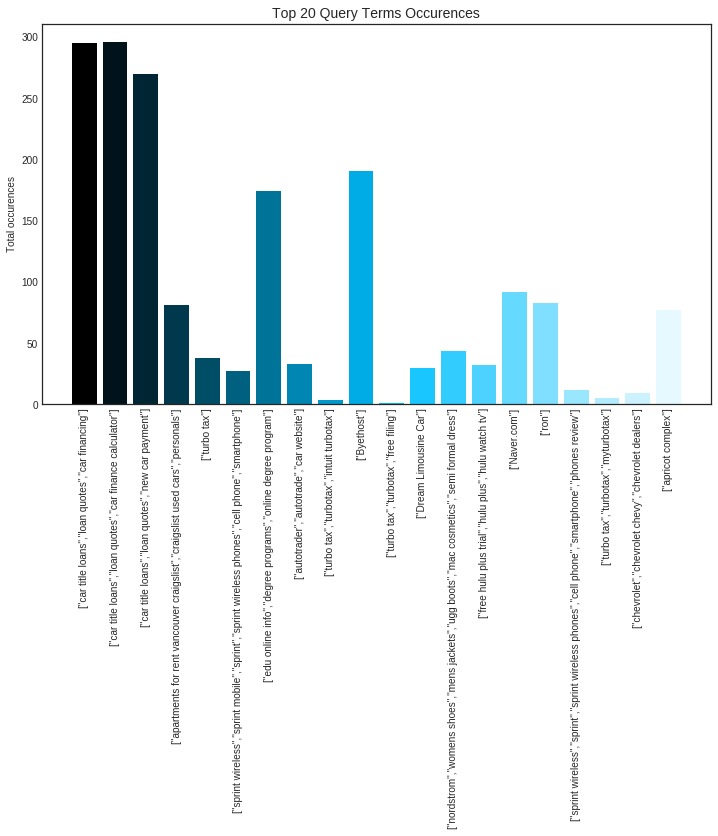

In [37]:
# Query terms table
fig,ax = plt.subplots(figsize=(12, 7))
bcolor = ['#000000', '#00131a', '#002633', '#00394d', '#004d66', '#006080', '#007399', '#0086b3', '#0099cc', '#00ace6', '#00bfff', '#1ac6ff', '#33ccff', '#4dd2ff', '#66d9ff', '#80dfff', '#99e6ff', '#b3ecff', '#ccf2ff', '#e6f9ff']
plt.bar(x = qt_table.head(20).index, height = qt_table.head(20)['valid_clicks'],color=bcolor)

plt.ylabel('Total occurences')
plt.title('Top 20 Query Terms Occurences', fontsize=14);
plt.xticks(rotation = 'vertical')

total_num = float(len(qt_table))
for i in [1,5,10, 50, 100, 200]:
    print ('-- {:.2f}% of query terms had {} or more valid clicks'.format( (qt_table['valid_clicks'][qt_table['valid_clicks']>=i].count()) / total_num *100,i))
#-- 91.38% of query terms had 1 or more valid clicks
#-- 11.44% of query terms had 5 or more valid clicks

-- 91.38% of query terms had 1 or more valid clicks
-- 11.44% of query terms had 5 or more valid clicks
-- 5.37% of query terms had 10 or more valid clicks
-- 1.16% of query terms had 50 or more valid clicks
-- 0.19% of query terms had 100 or more valid clicks
-- 0.12% of query terms had 200 or more valid clicks

3. For IP addresses with > 1 click:
Provide a breakdown on invalid and valid clicks. Include steps taken to conduct analysis
Provide a breakdown on whether these users send the same query term for each click. Include steps taken to conduct analysis
Identify any shared attributes for this pool of users (if any). Include steps taken to conduct analysis


In [38]:
ip_list = df.IP_address.value_counts()[df.IP_address.value_counts() >1].to_frame().index


In [39]:
df_ip = df[df.IP_address.isin(ip_list)]

In [40]:
# Provide a breakdown on invalid and valid clicks. Include steps taken to conduct analysis
ip_status_table = df_ip.click_status.value_counts().to_frame()
ip_status_table['percentage'] = ip_status_table.click_status / ip_status_table.click_status.sum()
ip_status_table




,click_status,percentage
1,2453,0.81279
0,565,0.18721


results
	click_status	percentage
1	2453	0.81279
0	565	0.18721

In [41]:
# Provide a breakdown on whether these users send the same query term for each click
ip_query_table = pd.pivot_table(df_ip,index=['IP_address','query_term'],values='click_status',aggfunc=[len]).reset_index()
ip_query_table.head()

,IP_address,query_term,len
,,,click_status
0,0.38.12.224,"[""youtube"",""youtuby"",""r youtube""]",1
1,0.38.12.224,"[""youtube"",""youtuby"",""youtube org""]",2
2,0.53.181.217,"[""Nyanko Seek""]",3
3,0.71.103.209,"[""meet girls"",""dating girls""]",4
4,0.73.240.6,"[""Badidu""]",2



IP_address	query_term	len
0	0.38.12.224	["youtube","youtuby","r youtube"]	1
1	0.38.12.224	["youtube","youtuby","youtube org"]	2
2	0.53.181.217	["Nyanko Seek"]	3
3	0.71.103.209	["meet girls","dating girls"]	4
4	0.73.240.6	["Badidu"]	2

In [42]:
ip_query_table_2 = pd.pivot_table(ip_query_table,index=['IP_address'],values='query_term',aggfunc=[len]).reset_index()
ip_query_table_2.columns = ['IP_address','unique_query_terms']


/home/aurobindo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [43]:
ip_unique_query = ip_query_table_2.unique_query_terms.value_counts().to_frame()
ip_unique_query['percentage'] = ip_unique_query.unique_query_terms / ip_unique_query.unique_query_terms.sum()
ip_unique_query

,unique_query_terms,percentage
1,736,0.623201
2,379,0.320914
3,50,0.042337
4,13,0.011008
5,3,0.002540



unique_query_terms	percentage
1	736	0.623201
2	379	0.320914
3	50	0.042337
4	13	0.011008
5	3	0.002540

In [44]:
# Identify any shared attributes for this pool of users (if any)
# Create ip_clicks_status: 1 = IP addresses with > 1 click, 0 = IP addresses with 1 click
df['ip_clicks_status'] = df.IP_address.map(lambda x: 1 if x in ip_list else 0)


In [45]:
df['ip_clicks_status'].sum() / float(len(df['ip_clicks_status']))


0.2987231515391468

0.2987231515391468

In [46]:
df.to_csv('cleaned_data.csv')

In [47]:
ip_query_table

,IP_address,query_term,len
,,,click_status
0,0.38.12.224,"[""youtube"",""youtuby"",""r youtube""]",1
1,0.38.12.224,"[""youtube"",""youtuby"",""youtube org""]",2
2,0.53.181.217,"[""Nyanko Seek""]",3
3,0.71.103.209,"[""meet girls"",""dating girls""]",4
4,0.73.240.6,"[""Badidu""]",2
5,0.82.169.232,"[""watch tv live"",""pinoy channel"",""My Pinoy Show""]",2
6,0.82.173.102,"[""meet girls"",""dating girls""]",2
7,0.82.36.53,"[""loda""]",5
8,1.35.179.235,"[""Star Text""]",2


In [48]:
df.head()

,click_status,AMP_timestamp,query_term,IP_address,user,cost_per_click,conversions,devices,date,hour,query_term_list,len_query_term_list,ip_clicks_status
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,0.28,0,iPad,29/01/1,11,"[michael kors, michael michael kors]",2,0
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,0.17,0,Windows,29/01/1,11,"[meet girls, dating girls]",2,1
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,0.17,0,Windows,29/01/1,11,"[meet girls, dating girls]",2,1
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,0.90,0,Windows,29/01/1,11,"[credit report, credit karma, free online cred...",3,0
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,0.17,0,compatible,29/01/1,11,[Byethost],1,1


In [49]:
df['click_status'].unique()

array([1, 0])

In [52]:
df['query_term'].unique()

array(['["michael kors","michael michael kors"]',
       '["meet girls","dating girls"]',
       '["credit report","credit karma","free online credit report"]',
       ..., '["watch videos online","daily motion","dailymotion"]',
       '["Photo Shop Face Lift"]', '["Xe"]'], dtype=object)